In [33]:
#fisrt we will extract the extract the file
# use index_col=0 to delete the automatic index from pandas  

import pandas as pd 
AICC =  pd.read_csv('Temperature Jouzel AICC.csv', index_col=0)
AICC

,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
bag,,,,,,
1,0,-50,-55,NaN,"218,3","3,105321"
2,"0,55","-43,55977","-50,51333333",NaN,"218,3","3,104805"
3,"1,1","-37,44019","-46,02666667",NaN,"218,3","3,104404"
4,"1,65","-31,64156","-41,54",NaN,"218,3","3,104025"
5,"2,2","-24,55278","-34,51666667",NaN,"218,3","3,103453"
...,...,...,...,...,...,...
5815,"3197,7","816871,6",817562,"-432,2",211,"1,529"
5816,"3198,25","817693,6",818631,"-431,4","211,2","1,548"
5817,"3198,8","818505,5",819700,"-430,3","211,3","1,576"


In [38]:
#extract 2 columns from dataset Temperature & AICC2012 which represents the years 
df = AICC[['temp', 'AICC2012']]
df

,temp,AICC2012
bag,,
1,"218,3",-55
2,"218,3","-50,51333333"
3,"218,3","-46,02666667"
4,"218,3","-41,54"
5,"218,3","-34,51666667"
...,...,...
5815,211,817562
5816,"211,2",818631
5817,"211,3",819700


In [23]:
#now we will follow the same steps to extract the CO2 (ppmv) & Gasage (yr BP)
#add skiprows because the because it's a string and we want to start counting from the first numeric row

import pandas as pd

CO2 = pd.read_csv('CO22.csv', skiprows=0)
dff = CO2[['Gasage (yr BP) ','CO2 (ppmv)']]
dff


,Gasage (yr BP),CO2 (ppmv)
0,"-51,030","368,022"
1,"-48,000","361,781"
2,"-46,279","359,648"
3,"-44,406","357,107"
4,"-43,080","353,947"
...,...,...
1896,"803.925,284","202,922"
1897,"804.009,871","207,499"
1898,"804.522,675","204,862"
1899,"805.132,442","202,227"


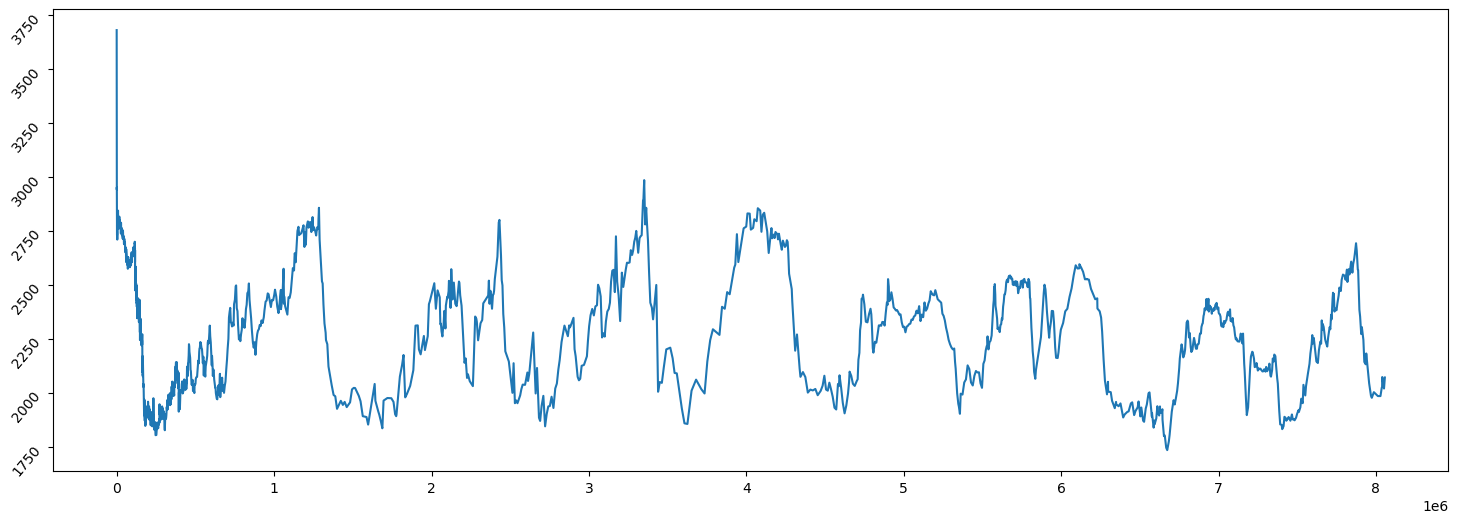

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
CO2 = pd.read_csv('CO22.csv')


# plotting Gasage (yr BP) vs CO2 (ppmv)
plt.figure(figsize=(18, 6))
x_axis = CO2['Gasage (yr BP)']
y_axis = CO2['CO2 (ppmv)']
plt.plot(x_axis, y_axis)


#https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping 

# Set y-axis ticks
plt.yticks(rotation=50, ha='right')

plt.show()


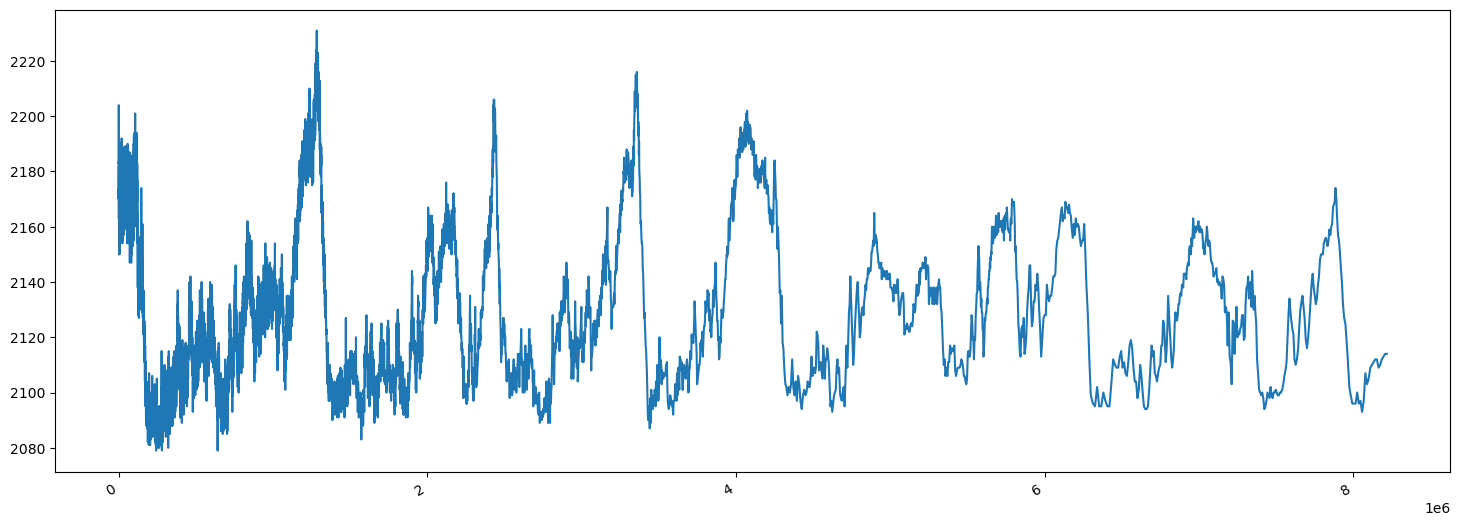

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
AICC = pd.read_csv('Temperature Jouzel AICC.csv')

# configure image size
plt.figure(figsize=(18, 6))

# define X and Y axis
x_axis = AICC['AICC2012']
y_axis = AICC['temp']
plt.plot(x_axis, y_axis)

# Rotate and align x-axis tick labels
plt.xticks(rotation=30, ha='right')


plt.show()
